# Look at the sampling pattern for the weighted-distance merit function
David Eriksson <dme65@cornell.edu>

In [1]:
from pySOT.auxiliary_problems import candidate_uniform
from pySOT.experimental_design import LatinHypercube
from pySOT.surrogate import RBFInterpolant, CubicKernel, LinearTail
from pySOT.optimization_problems import Ackley
from pySOT.utils import unit_rescale
import numpy as np
import scipy.spatial as scpspatial

import matplotlib.pylab as plt
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

## Use the 1-dimensional Ackley function

In [2]:
ackley = Ackley(dim=1)

## Use 5 initial points

In [3]:
X = np.expand_dims([-15, -10, 0, 1, 20], axis=1)
npts = len(X)
fX = np.array([ackley.eval(x) for x in X])

rbf = RBFInterpolant(dim=1, kernel=CubicKernel(), tail=LinearTail(1))
for i in range(npts):
    rbf.add_points(X[i,:], fX[i])

## Predict function values and compute minimum distances for a linspace

In [4]:
XX = np.expand_dims(np.linspace(ackley.lb, ackley.ub, 500), axis=1)
fXX = np.array([ackley.eval(x) for x in XX])
fvals = rbf.predict(XX)
dists = scpspatial.distance.cdist(XX, X)
dists = np.amin(dists, axis=1, keepdims=True)

## Use three different weights for the merit function

In [5]:
weights = [0, 0.5, 1.0]

## Use CandidateUniform to find the next evaluation for each weight

In [6]:
xsample = []
for w in weights:
    x = candidate_uniform(
        num_pts=1, X=X, Xpend=None, fX=fX, num_cand=1000, \
        surrogate=rbf, opt_prob=ackley, weights = [w])
    xsample.append(x)

## Plot the next evaluations for each weight and look at the shape of the merit function

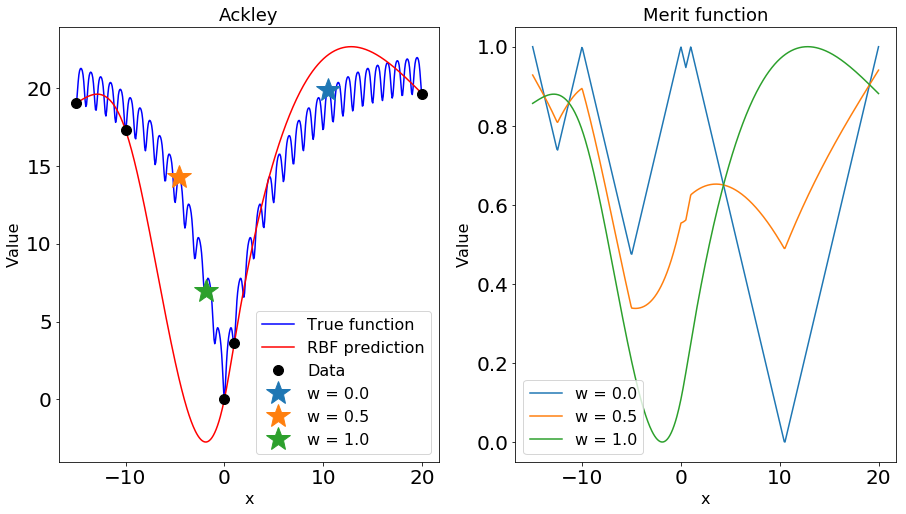

In [7]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(XX, fXX, 'b')
plt.plot(XX, rbf.predict(XX), 'r')
plt.plot(X, fX, 'k.', markersize=20)
leg = []
for w, xn in zip(weights, xsample):
    plt.plot(xn, ackley.eval(xn), '*', markersize=25)
    leg.append("w = %.1f" % w)
plt.legend(["True function", "RBF prediction", "Data"] + leg, fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.xlabel("x", fontsize=16)
plt.title("Ackley", fontsize=18)

plt.subplot(1, 2, 2)
for w, xn in zip(weights, xsample):
    plt.plot(XX, w*unit_rescale(fvals) + (1.0-w)*(1.0-unit_rescale(dists)))
plt.legend(leg, fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.xlabel("x", fontsize=16)
plt.title("Merit function", fontsize=18)

plt.show()